# Performing EDA and Visualizing the insights and model evaluation of Titanic dataset.

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Cleaning the dataset and deriving few insights is the main agenda here


# Importing necessary libraries and reading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df=pd.read_csv('test.csv')

# Checking the spread of data in top and bottom

In [34]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Inference: Top and bottom has the passengers data who are mid aged and there are many missing values which needs to be handled

# Size of dataset

In [36]:
df.shape

(418, 11)

Observation: Dataset has 418 observations/Passenger with 11 attributes/details

# Data types info and statistical analysis

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [38]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Observation: The least age of people who travelled in Titanic is less than a year old and maximum is 77. 50% of the people who travelled where less than 28 years old. The Fare/Price of ticket ranges from 0 to 512 based on travelling class

# Checking for null values

In [39]:
df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

#### Inference: We have infromation of Passengers class travelled but not their ages or cabin chosen. One passenger's ticket fare is missing which needs to be figured out.

# Dropping the columns which are not contributing for prediction

In [40]:
df.drop(['Name','Embarked','Ticket', 'PassengerId'], axis=1, inplace= True)

In [41]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,male,34.5,0,0,7.8292,NaN
1,3,female,47.0,1,0,7.0000,NaN
2,2,male,62.0,0,0,9.6875,NaN
3,3,male,27.0,0,0,8.6625,NaN
4,3,female,22.0,1,1,12.2875,NaN


# Handling missing values

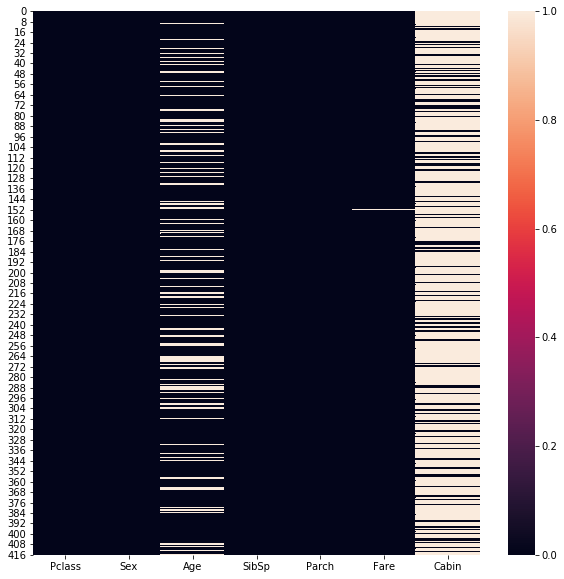

In [42]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.isnull())

In [43]:
(df.isnull().sum()/df.shape[1]).sort_values(ascending=False)

Cabin     46.714286
Age       12.285714
Fare       0.142857
Parch      0.000000
SibSp      0.000000
Sex        0.000000
Pclass     0.000000
dtype: float64

Inference: As 46.71% of cabin information is not found and train data has no cabin feature, this will be dropped.

In [44]:
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [45]:
df.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

#### Infecrence: As 75% of the passengers are below 39 years and average age of people travelled in tiitanic is 29.699, missing values can be handled by stastical method

#### Filling the null values, with average age in particular class

In [46]:
def age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 38.23;
        elif pclass==2:
            return 29.87;
        else:
            return 25.14;
    else:
        return age;

In [47]:
df['Age']=df[['Age','Pclass']].apply(age,axis=1)

In [48]:
df[df.Fare==df.Fare.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare
266,1,male,38.23,0,0,0.0
372,1,male,49.00,0,0,0.0


In [49]:
#As the null values belongs to P1 class, average fare of that class is used to fill these values

In [50]:
df_fare=df[df['Pclass']==1]
meanFare=df_fare.Fare.mean()
df.Fare.fillna(meanFare, inplace=True)

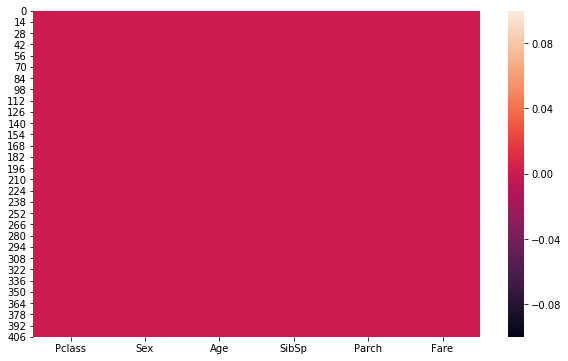

In [51]:
plt.subplots(figsize=(10,6))
sns.heatmap(df.isnull())

In [52]:
df.isnull().any()

Pclass    False
Sex       False
Age       False
SibSp     False
Parch     False
Fare      False
dtype: bool

Observation: Dataset is cleaned and null values are handled

In [53]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


# Scaling and finding few patterns

In [54]:
df.Sex=df.Sex.map({'male':0,'female':1})
df.rename({'Sex':'Female'},axis=1, inplace =True)
df.head()

,Pclass,Female,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


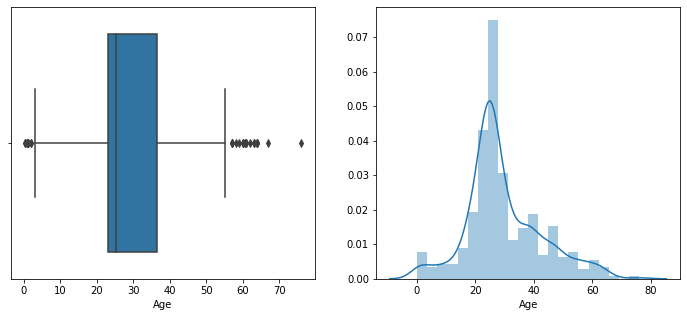

In [55]:
fig, ax= plt.subplots(1,2, figsize=(12,5))
sns.boxplot(df.Age, ax=ax[0])
sns.distplot(df.Age, ax=ax[1])

#### observation: There are outliers in Age feature and is slightly right skewed.

In [56]:
df.Parch.value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [57]:
Parch9df=df[df.Parch==9]
Parch9df

,Pclass,Female,Age,SibSp,Parch,Fare
342,3,0,25.14,1,9,69.55
365,3,1,25.14,1,9,69.55


###### Based on our observation from anaylsis, female gender survived more when compared to male from the passenger class 3. Therefor assigning those values in order to train dataset.

In [58]:
list1=[0,1]
Parch9df['Survived']=list1
Parch9df

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,Female,Age,SibSp,Parch,Fare,Survived
342,3,0,25.14,1,9,69.55,0
365,3,1,25.14,1,9,69.55,1


In [59]:
Parch9df.to_csv('parch9.csv')

Observation : children travelling with nanny are more.

In [60]:
df.SibSp.value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

Observation: More number of people with no relatives

In [61]:
df.head()

,Pclass,Female,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


### Creating dummies for  features

In [62]:
for i in ['Pclass','SibSp', 'Parch']:
    df=pd.get_dummies(df,prefix=i, columns=[i], drop_first=True)
    
df.head()

,Female,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,0,34.5,7.8292,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,47.0,7.0000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,62.0,9.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,27.0,8.6625,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,22.0,12.2875,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
Female      418 non-null int64
Age         418 non-null float64
Fare        418 non-null float64
Pclass_2    418 non-null uint8
Pclass_3    418 non-null uint8
SibSp_1     418 non-null uint8
SibSp_2     418 non-null uint8
SibSp_3     418 non-null uint8
SibSp_4     418 non-null uint8
SibSp_5     418 non-null uint8
SibSp_8     418 non-null uint8
Parch_1     418 non-null uint8
Parch_2     418 non-null uint8
Parch_3     418 non-null uint8
Parch_4     418 non-null uint8
Parch_5     418 non-null uint8
Parch_6     418 non-null uint8
Parch_9     418 non-null uint8
dtypes: float64(2), int64(1), uint8(15)
memory usage: 16.0 KB


# Copying the test data set to predict values

In [64]:
df.to_csv('Cleaned_test.csv')